<a href="https://colab.research.google.com/github/hvakanksha/AML_Assignment/blob/main/AML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['target'] = housing.target


In [ ]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Descriptive statistics
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

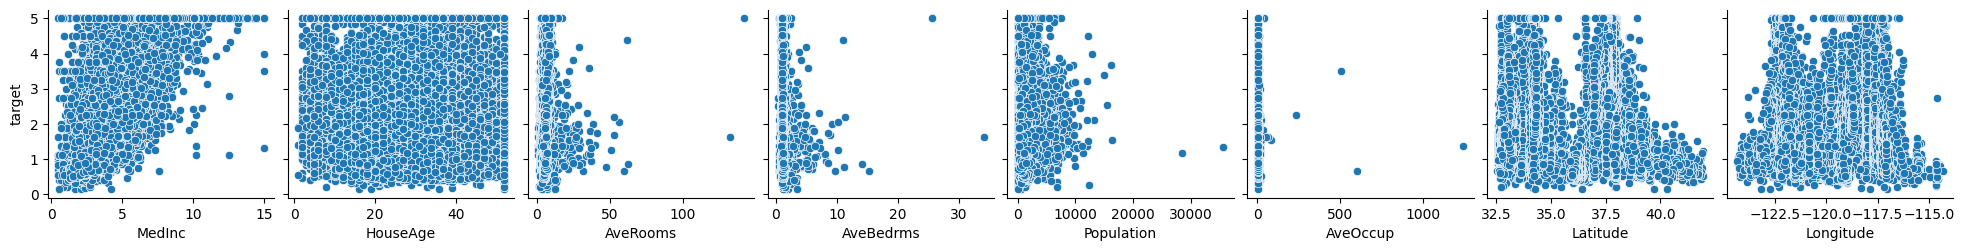

In [ ]:
# Visualizations (e.g., histograms, scatter plots)
sns.pairplot(data, x_vars=housing.feature_names, y_vars='target', height=2.5)
plt.show()


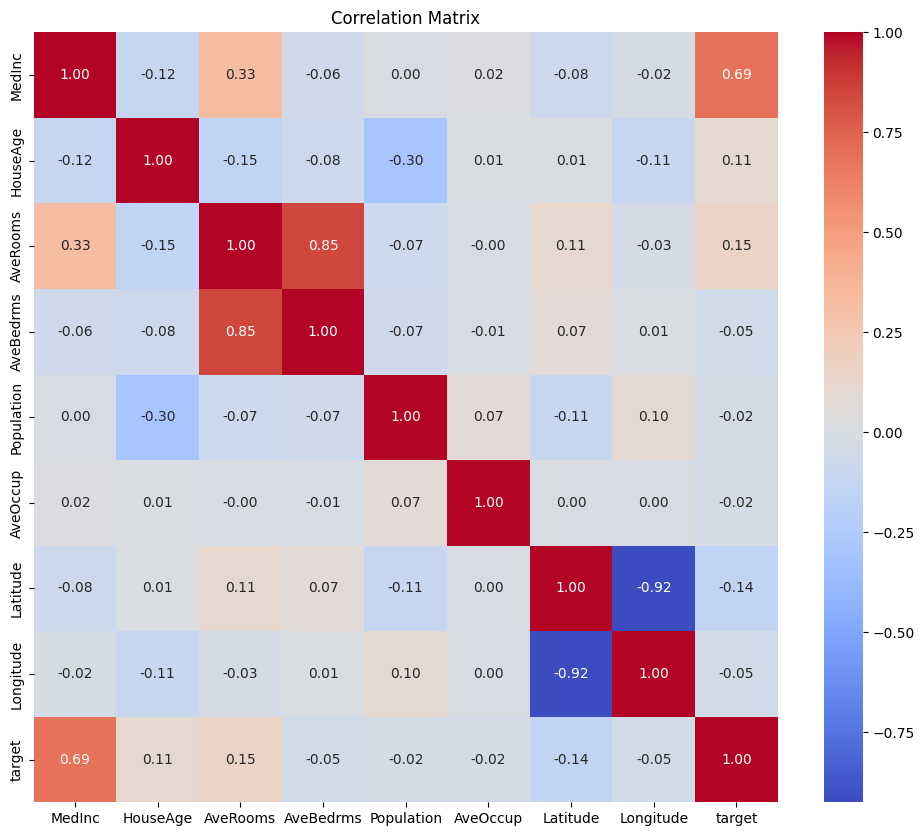

In [ ]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

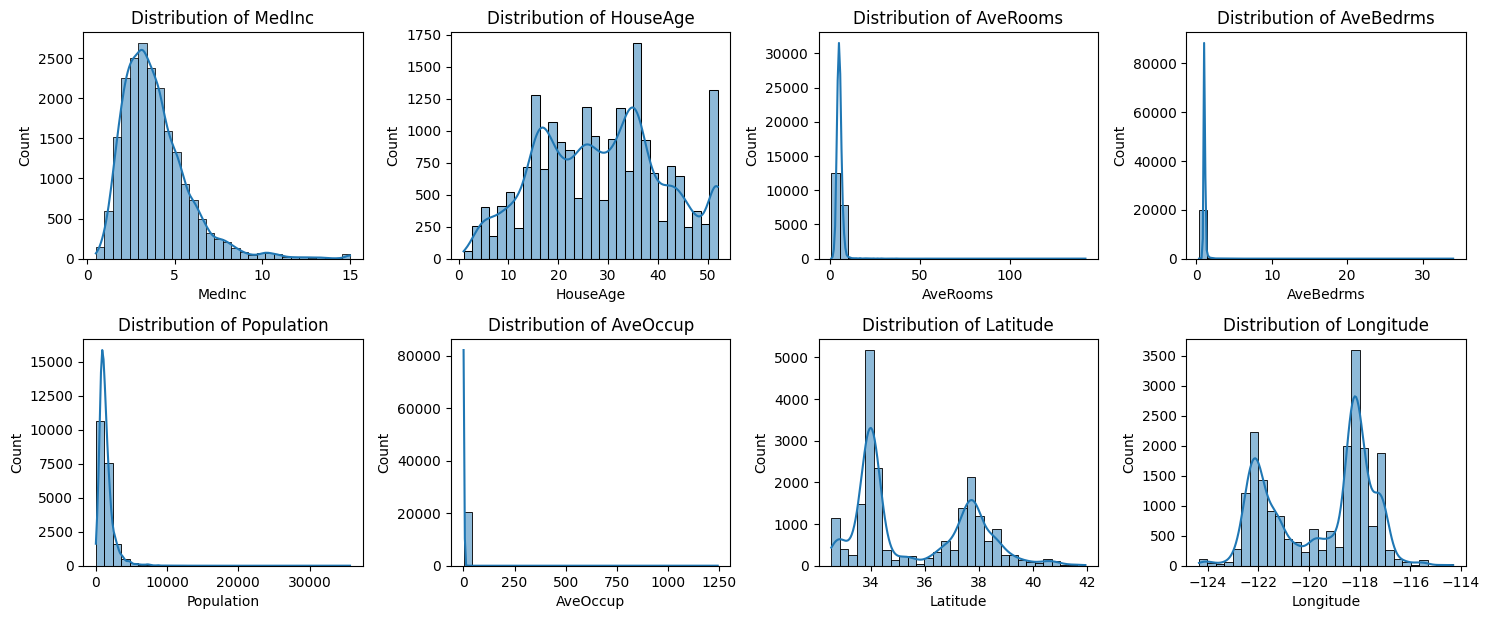

In [ ]:
# Distribution of numerical features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(housing.feature_names):
    plt.subplot(4, 4, i+1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

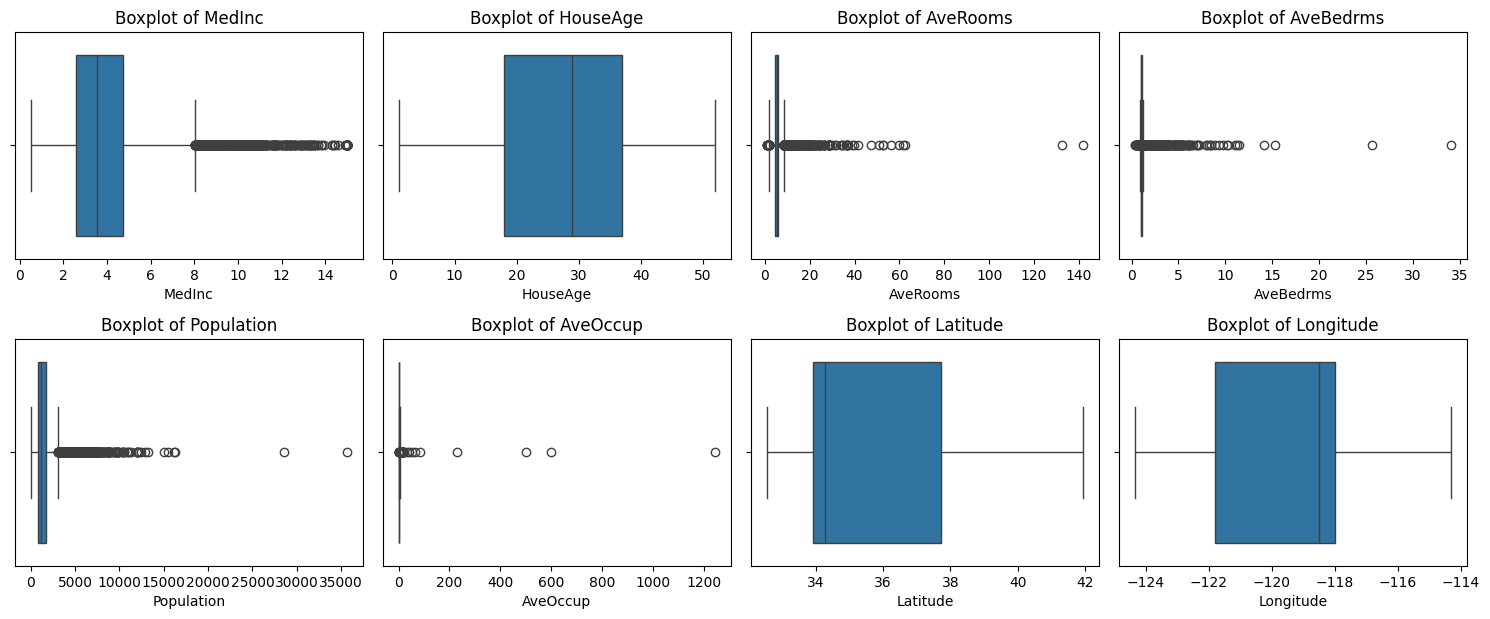

In [ ]:
# Outlier detection using boxplots
plt.figure(figsize=(15, 12))
for i, feature in enumerate(housing.feature_names):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

In [ ]:
# Specify the features for outlier treatment
columns_to_treat = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

# Function to perform outlier treatment using IQR
def treat_outliers_iqr(df, columns):
    treated_data = df.copy()
    for column in columns:
        # Calculate the first quartile (Q1)
        Q1 = df[column].quantile(0.25)
        # Calculate the third quartile (Q3)
        Q3 = df[column].quantile(0.75)
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        # Define the lower bound
        lower_bound = Q1 - 1.5 * IQR
        # Define the upper bound
        upper_bound = Q3 + 1.5 * IQR
        # Replace outliers with NaN
        treated_data[column] = treated_data[column].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else None)
    return treated_data

# Perform outlier treatment
data = treat_outliers_iqr(data, columns_to_treat)

# Display the treated data
print("Treated Data:")
data.head()


Treated Data:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,NaN,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,NaN,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
data.shape

(20640, 9)

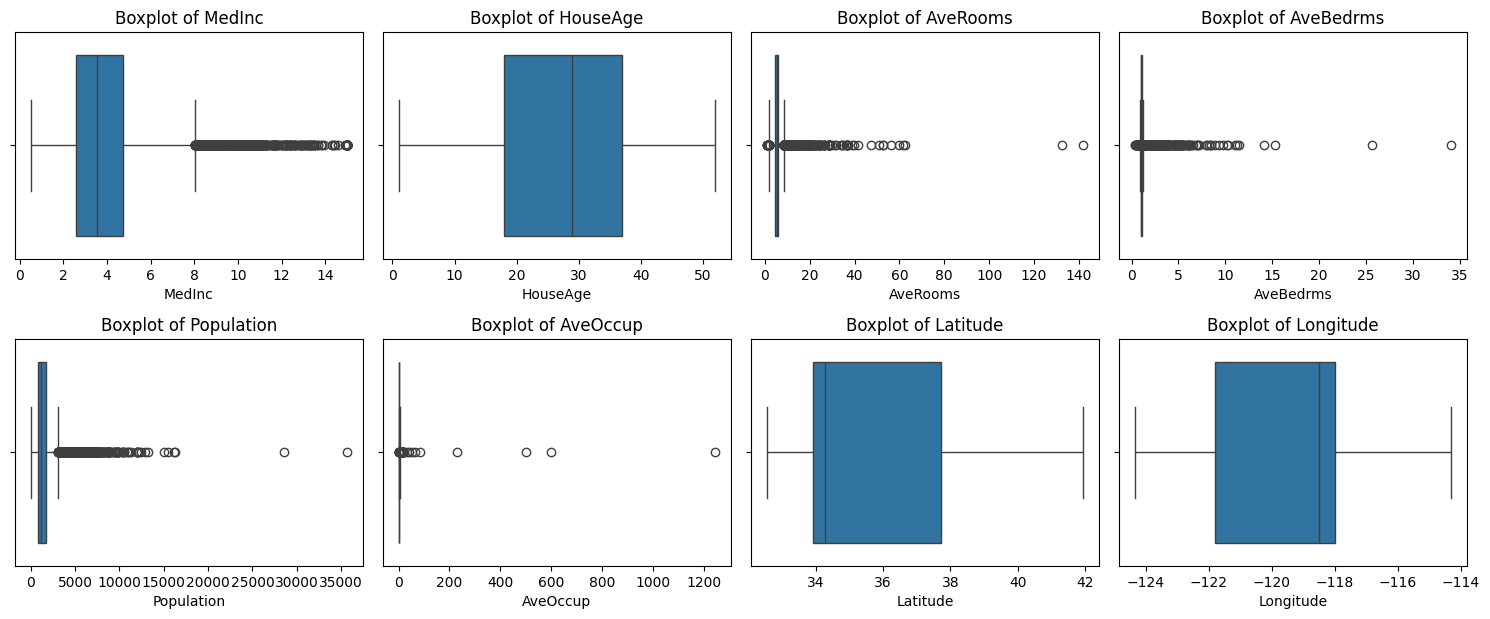

In [ ]:
# Outlier detection using boxplots
plt.figure(figsize=(15, 12))
for i, feature in enumerate(housing.feature_names):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

Outliers have been treated

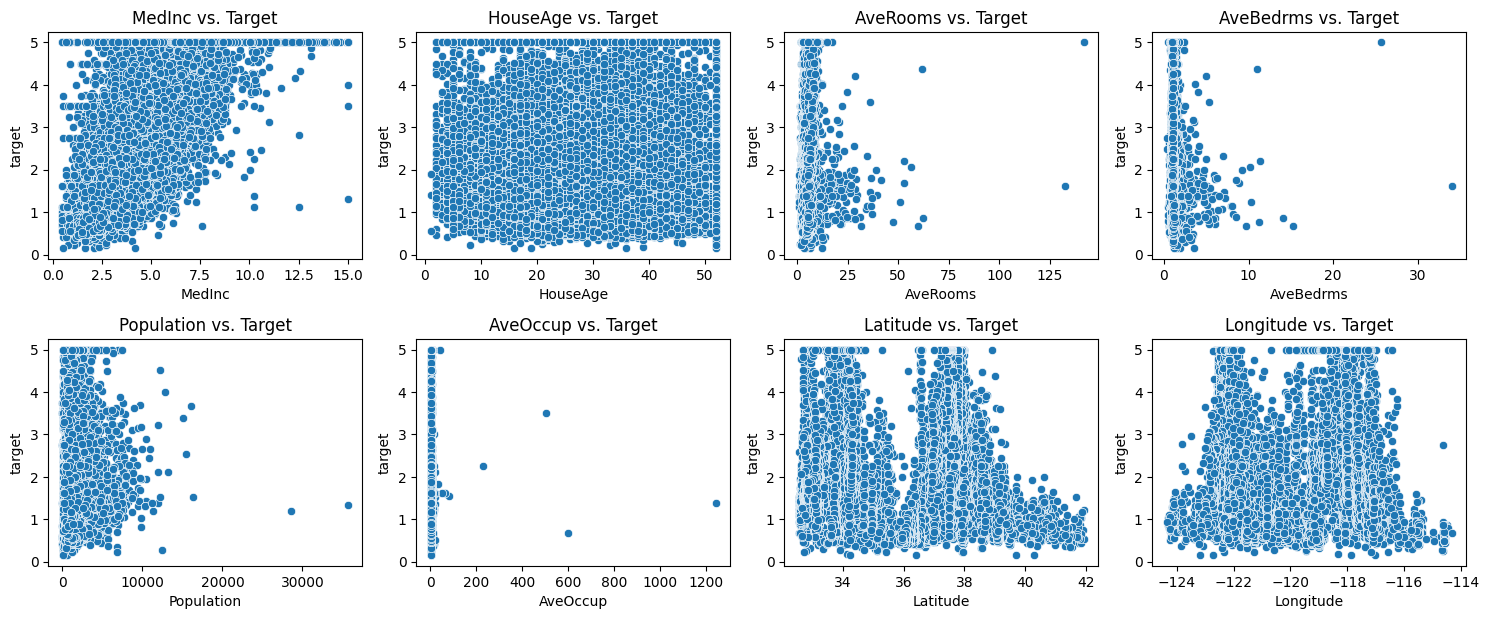

In [ ]:
# Scatter plots for target variable vs. features
plt.figure(figsize=(15, 12))
for i, feature in enumerate(housing.feature_names):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=data[feature], y=data['target'])
    plt.title(f'{feature} vs. Target')
    plt.tight_layout()
plt.show()

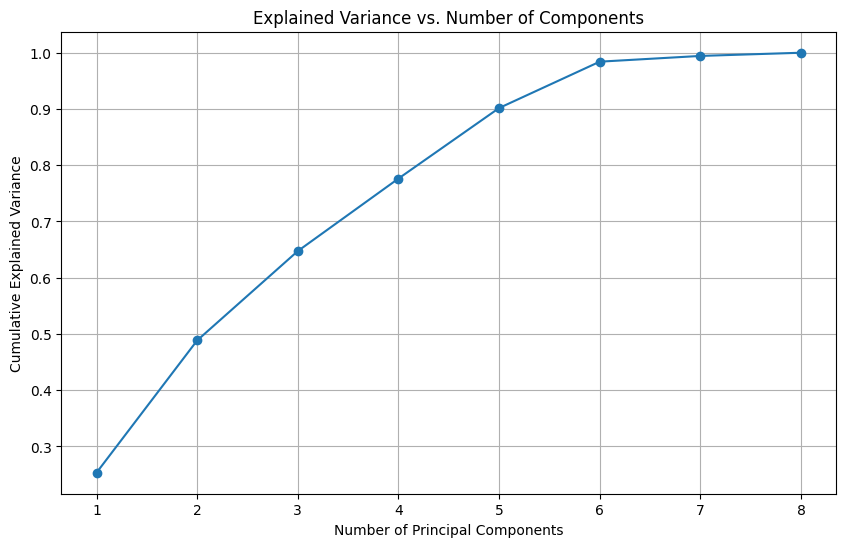

In [ ]:
# Assuming 'data' is your DataFrame containing the specified columns
data_subset = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'target']]

# Drop rows with missing values
data_subset.dropna(inplace=True)

# Separate features and target variable
X = data_subset.drop(columns=['target'])
y = data_subset['target']

# Standardize the features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)



# Cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data['target'], test_size=0.2, random_state=42)

# Initialize the models
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(), MLPRegressor()]

# Train and evaluate the models
results = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Model': type(model).__name__, 'MSE': mse, 'R2': r2})

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

                   Model       MSE        R2
0       LinearRegression  0.555892  0.575788
1                  Ridge  0.555803  0.575855
2                  Lasso  0.938034  0.284167
3  DecisionTreeRegressor  0.506316  0.613620
4  RandomForestRegressor  0.254308  0.805932
5                    SVR  1.332012 -0.016485
6           MLPRegressor  0.590698  0.549226


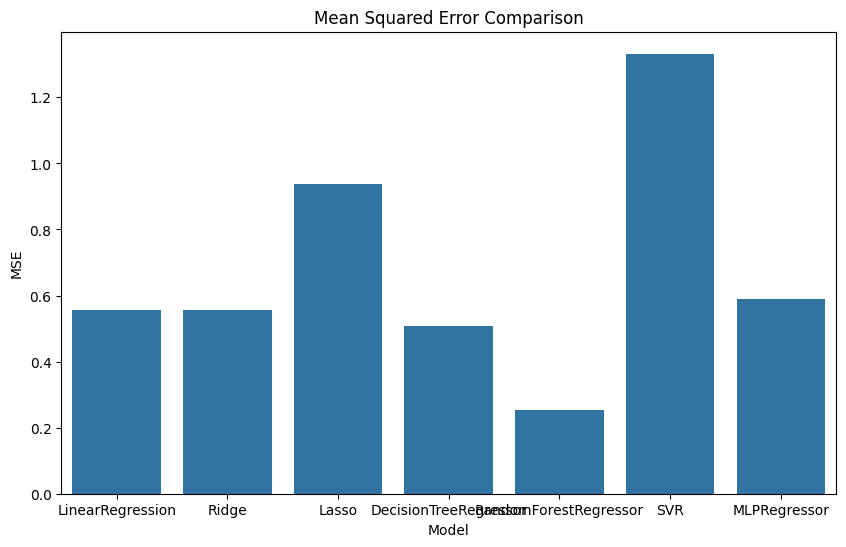

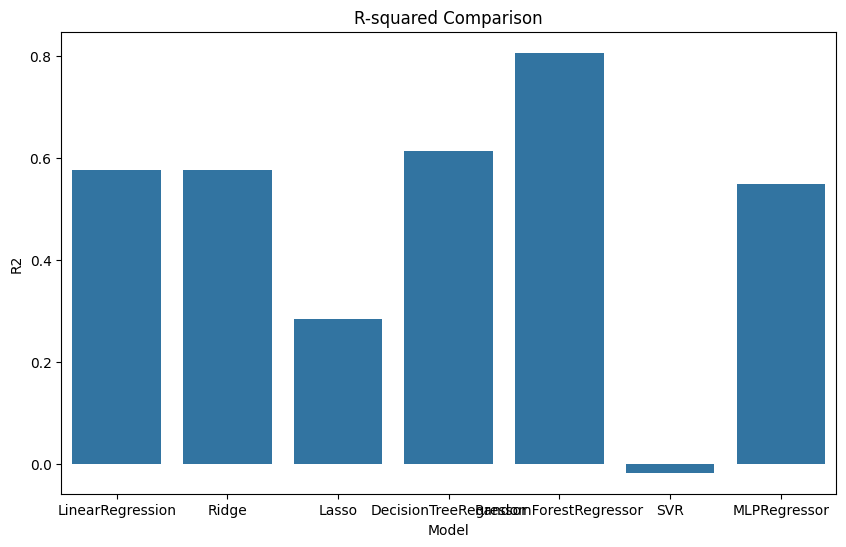

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Mean Squared Error Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('R-squared Comparison')
plt.show()